### 学習データに関して

予測モデルを作成するときには全てのデータを学習に使用するのは良くない。
→なぜなら、全てのデータを学習に使用してしまうと、未知のデータに対して上手く予測できているかどうかを評価（汎化性能）することができないからである。  
→逆に学習のデータとテストデータを分けることで、作成したモデルが上手く予測できているモデルなのか、はたまた過学習により予測が上手くいっていないのかをテストデータを使用して判断することが出来る。  

・実際にはデータを分割する際には3つのデータに分ける必要がある。（学習用・テスト用・検証用）  
→なぜなら、精度が良くないと判断するのはテスト用のデータの時で、パラメータの調整はテスト用データに対して調整している。そのため、テスト用のデータに対して精度が良くなるようにしているのであって、本当の未知のデータに対して精度がいいのか把握することが出来ない。そのため未知のデータに対して精度がいいのか最終的に確認するために検証用のデータが必要になってくる。


・データを分割するときの注意
→データを分割する時はstratified（層化）に注意する必要がある。  
→なぜなら、学習データにはクラス１のみでテストデータはクラス２のみであった場合、予測が上手くいかないからである。
→このようにクラス分類などstratifiedを気にしなければならない場合は、クラスのバランスを気にしてデータを分割する必要がある。

In [7]:
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

from sklearn import linear_model
clf = linear_model.LogisticRegression()


In [5]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### データを分割する方法

大きく3種類　  

*　hold-out法  
*　cross validation法  
*　leave one out法  


### hold-out法

一言で言うとデータを学習データとテストデータに分割しモデルの制度を確かめる手法
例えば、データが100個ある場合は、６対４の割合で分割し、学習用データを60個、テストデータを４０個に分割する。
データが多いときにはこちらを使用。


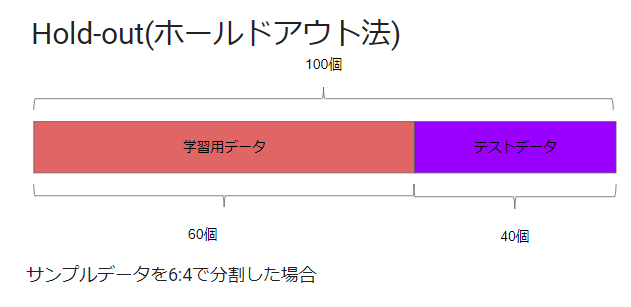

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X ,y , test_size=0.4)

In [11]:
# 全データのサイズ
print("全データサイズ")
print("Xデータ")
print(X.shape)
print()
print("yデータ")
print(y.shape)
print()

全データサイズ
Xデータ
(569, 30)

yデータ
(569,)



In [12]:
print("全データサイズ")
print("X_trainデータ")
print(X_train.shape)
print("X_testデータ")
print(X_test.shape)
print()
print("y_trainデータ")
print(y_train.shape)
print("y_testデータ")
print(y_test.shape)
print()

全データサイズ
X_trainデータ
(341, 30)
X_testデータ
(228, 30)

y_trainデータ
(341,)
y_testデータ
(228,)



In [14]:
# トレーニングデータで学習
clf.fit(X_train,y_train)
print("トレーニングデータの性能")
print(clf.score(X_train,y_train))

print()

print("テストデータの性能")
print(clf.score(X_test,y_test))

トレーニングデータの性能
0.9589442815249267

テストデータの性能
0.9517543859649122


/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 層化分割法


In [55]:
# データのそれぞれのクラスに関して
one_list = []
zero_list = []
for target in y:
    if target == 0:
        zero_list.append(target)
    else:
        one_list.append(target)
print("それぞれのクラスの数")
print("０クラス")
print(len(zero_list)/len(y))
print("1クラス")
print(len(one_list)/len(y))

それぞれのクラスの数
０クラス
0.37258347978910367
1クラス
0.6274165202108963


In [70]:
# stratifiedを考慮せずに分割した場合。
X_train, X_test, y_train, y_test  = train_test_split(X ,y , test_size=0.4)
one_list = []
zero_list = []
for target in y_train:
    if target == 0:
        zero_list.append(target)
    else:
        one_list.append(target)
print("stratifiedを考慮せずに分割した場合") 
print("それぞれのクラスの数")
print("０クラス")
print(len(zero_list)/len(y_train))
print("1クラス")
print(len(one_list)/len(y_train))

stratifiedを考慮せずに分割した場合
それぞれのクラスの数
０クラス
0.41055718475073316
1クラス
0.5894428152492669


In [73]:
# stratifiedを考慮した場合

X_train, X_test, y_train, y_test  = train_test_split(X ,y , test_size=0.4 ,stratify=y)
one_list = []
zero_list = []
for target in y_train:
    if target == 0:
        zero_list.append(target)
    else:
        one_list.append(target)

print("stratifiedを考慮した場合")
print("それぞれのクラスの数")
print("０クラス")
print(len(zero_list)/len(y_train))
print("1クラス")
print(len(one_list)/len(y_train))

stratifiedを考慮した場合
それぞれのクラスの数
０クラス
0.3724340175953079
1クラス
0.6275659824046921


### cross validation法

クロスバリデーション法(K-分割交差検証)はデータをK個に分割してそのうちの一つをテストデータにし、残りのk-1個のデータを学習用のデータに分割。その後、テストデータと学習用データを入れ替えてモデルの評価を図ると言うもの。つまり、K個に分解されたものはK回の検証が行われることになる。
これらのデータを平均してモデルの精度を確かめる。
データが10,000個以下ぐらいであればK分割交差検証を使用して行うのはあり。（データ量が多すぎると処理に時間がかかるため、ホールドアウト法を使用するか、クロスバリデーション法を使用するかは見極めが必要。。。）

以下の例では100個のデータに対して４分割(K=4)した場合の例
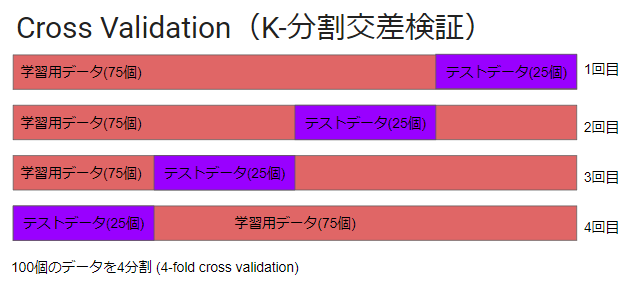

In [79]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10 , shuffle=True)

for train , test in kf.split(X,y):
    X_train , X_test = X[train] , X[test]
    y_train , y_test = y[train] , y[test]
    print("学習データの確認")
    print(X_train.shape)
    print(y_train.shape)
    print()
    print("テストデータの確認")
    print(X_test.shape)
    print(y_test.shape)
    print()
    clf.fit(X_train,y_train)
    print("結果")
    print(clf.score(X_test,y_test))
    print()

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.8947368421052632

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.9824561403508771

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.9473684210526315

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.9473684210526315

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.8947368421052632

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.9649122807017544

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.9122807017543859

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.9649122807017544

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.9298245614035088

学習データの確認
(513, 30)
(513,)

テストデータの確認
(56, 30)
(56,)

結果
0.9821428571428571



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

In [80]:
from sklearn.model_selection import  StratifiedKFold
skf = KFold(n_splits=10 , shuffle=True)

for train , test in skf.split(X,y):
    X_train , X_test = X[train] , X[test]
    y_train , y_test = y[train] , y[test]
    print("学習データの確認")
    print(X_train.shape)
    print(y_train.shape)
    print()
    print("テストデータの確認")
    print(X_test.shape)
    print(y_test.shape)
    print()
    clf.fit(X_train,y_train)
    print("結果")
    print(clf.score(X_test,y_test))
    print()

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.9473684210526315

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.8596491228070176

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.9649122807017544

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.9649122807017544

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.9473684210526315

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
1.0

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.9122807017543859

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.9298245614035088

学習データの確認
(512, 30)
(512,)

テストデータの確認
(57, 30)
(57,)

結果
0.8947368421052632

学習データの確認
(513, 30)
(513,)

テストデータの確認
(56, 30)
(56,)

結果
0.9107142857142857



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

In [108]:
#  クロスバリデーションのスコア(デフォルトで層化分類になっている。)
# １０分割を行なっている。
from sklearn.model_selection import cross_val_score
ave_score = cross_val_score(clf , X , y , cv=10)
print("平均スコア")
print(ave_score.mean()*100)
print(ave_score.std()*100)


平均スコア
94.20426065162907
1.5699834064995928


/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

### leave one out法

データ全体のうち1つだけをテストデータとする方法。データの量が少ない場合に行う方法でもある。
データが１００個あれば１つをテストデータとし、99個を学習データとして使用する。これを１００回繰り返して精度を検証する。
データが少ない時はこちらを使用する。

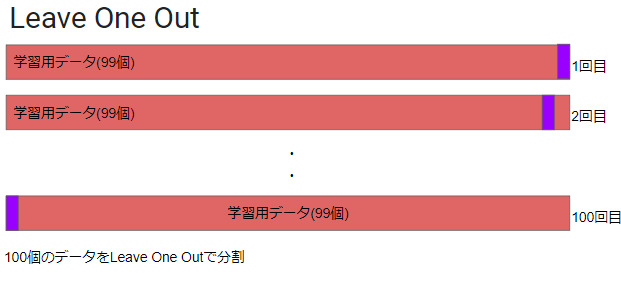

In [104]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
for train , test in loo.split(X,y):
    X_train , X_test = X[train] , X[test]
    y_train , y_test = y[train] , y[test]
    print("学習データの確認")
    print(X_train.shape)
    print(y_train.shape)
    print()
    print("テストデータの確認")
    print(X_test.shape)
    print(y_test.shape)
    print()
    clf.fit(X_train,y_train)
    print("結果")
    print(clf.score(X_test,y_test))
    print()

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter



学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter



学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter



学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
0.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0

学習データの確認
(568, 30)
(568,)

テストデータの確認
(1, 30)
(1,)

結果
1.0



/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

In [107]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
from sklearn.model_selection import cross_val_score
ave_score = cross_val_score(clf , X , y , cv=loo)
print("平均スコア")
print(ave_score.mean()*100)
print(ave_score.std()*100)

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

平均スコア
95.07908611599298
21.630441395100792


/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter